# Diffusion-Reaction in a Catalyst Pellet
This code solve the diffusion reaction in a catalyst pellet with all three geometries (slab, cylinder, and sphere)  for an nth oredr equation

## Nth order reaction

For an nth order reaction with $-r_A = kC_A^n$, using the below dimensionless variables one can write:

$$
u = \frac{C_A}{C_Ao}, \quad x = \frac{r}{a}, \quad \text{where, } a = \frac{V_p}{S_p}
$$

$$
\frac{1}{x^q} \frac{d}{dx} \big( x^q \frac{du}{dx} \big) - \frac{2}{n+1} \phi^2 u^n = 0 \\
$$

\begin{align*}
\phi^2 &=  a^2 (\frac{n+1}{2}) \frac{k}{D_{eff}} C_{Ao}^{n-1} \\
\\
\eta &= \frac{n+1}{2} \frac{1}{\phi^2} \frac{du}{dx}\bigg|_{x=1} \\
\end{align*}

* Ref: Section 7.4.3 from [1]

[1]. Chemical Reactor Design and Analysis Fundamentals <a href="file:///F:/Ebooks/10.%20Chemical%20Reaction%20Engineering/Chemical%20Reactor%20Design%20and%20Analysis%20Fundamentals%20-%20Rawling/Chemical_Reactor_Analysis_and_Design_Rawlings.pdf">PDF</a>

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [2]:
#Model parameters
n=1        #reaction order
k=8e-3     #reaction rate constant, m6/kgcat.mol.s
Deff=1e-6  #efective diffusivity, m2/s
Rhop=600   #pellet density, kg/m3
CAo=1      #surface concentration, mol/m3
Rs=3e-3    #pellet radius, m
q=2        #pellet shape, cylinder: q=1 sphere: q=2


In [3]:
#Calculate Thiele modulus, phi
a=Rs/3        #Characteristic length
k=Rhop*k      #reaction rate constant, 1/s
phi=a*np.sqrt((n+1)/2*k/Deff*CAo**(n-1))

print("phi= {:5.2f}".format(phi))

phi=  2.19


In [4]:
# Ordinary differential equations

def slODE(x, u):
    """
    slODE implements the governing bvps
    for reaction-diffusion in the slab pellet
    """    
    du=[ u[1],
        2/(n+1) * phi**2 * u[0]**n
    ]
    return np.vstack(du)

# Singularity matrix
S = np.array([ [0, 0],
               [0, -q] ])


In [5]:
# Boundary conditions

def slBC(ua, ub):
    """
    slBC defines the boundary conditions BC
    for reaction-diffusion in the slab pellet
    """
    res=[ ua[1],
         ub[0] - 1.0 ]
    return np.array(res)

In [6]:
# Analytical solution

def ExactSol():
    """
    ExactSol calculates the exact solution for reaction-diffusion
    equation in a spherical catalyst pellet with first order reaction
    Calculate c for 10 points along the pellet radius
    """
    xex = np.linspace(0, q+1, 10)        # Create a vector of 10 points
    uex = np.zeros_like(xex)
    uex[0] = 3*phi/np.sinh(3*phi);
    uex[1:-1]  = 3/xex[1:-1]*np.sinh(phi*xex[1:-1])/np.sinh(3*phi)

    eta=1/phi*(1/np.tanh(3*phi)-1/(3*phi))           # Effectiveness factor
    return xex, uex, eta

## Numerical Solution

In [7]:
# Initial guess
x_init = np.linspace(0, q+1, 5)
u_init = np.zeros([2, x_init.size])  
u_init[0]=1.0

In [8]:
# Call solver
res = solve_bvp(slODE, slBC, x_init, u_init, S=S)

(np.float64(0.0), np.float64(3.0), np.float64(0.0), np.float64(1.0))

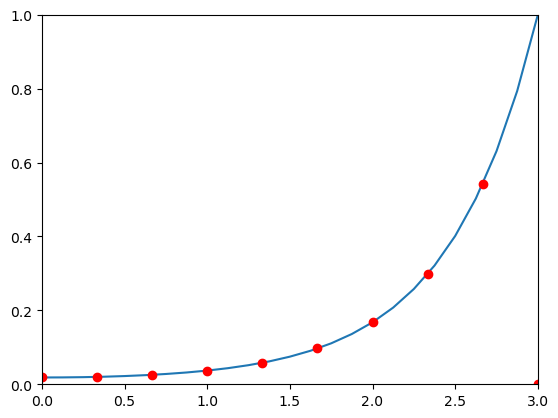

In [9]:
x_plot = np.linspace(0, q+1, 25)
u_plot = res.sol(x_plot)
plt.plot(x_plot, u_plot[0])

xex, uex, etax = ExactSol()
plt.plot(xex, uex, 'ro')

# Set axis limit
plt.axis((0, q+1, 0, 1))

In [10]:
# Calculate effectiveness factor from solution

eta_calc= (n+1)/2 * 1/phi**2 * res.y[1,-1]
print("eta_calc= {:5.2f}".format(eta_calc))

eta_calc=  0.39
